Решающее дерево представляет собой модель машинного обучения, которая используется для классификации и регрессии. Структура дерева состоит из узлов, где каждый внутренний узел соответствует проверке значения признака, а листовые узлы представляют собой конечные решения или прогнозы. Обучение решающего дерева происходит через рекурсивное разбиение данных на подмножества, чтобы минимизировать неопределенность или энтропию.

пример решающего дерева на картинке
и как это решающее дерево разделяет пространство параметров( в данном случае 2D пространство бьется на прямоугольники)

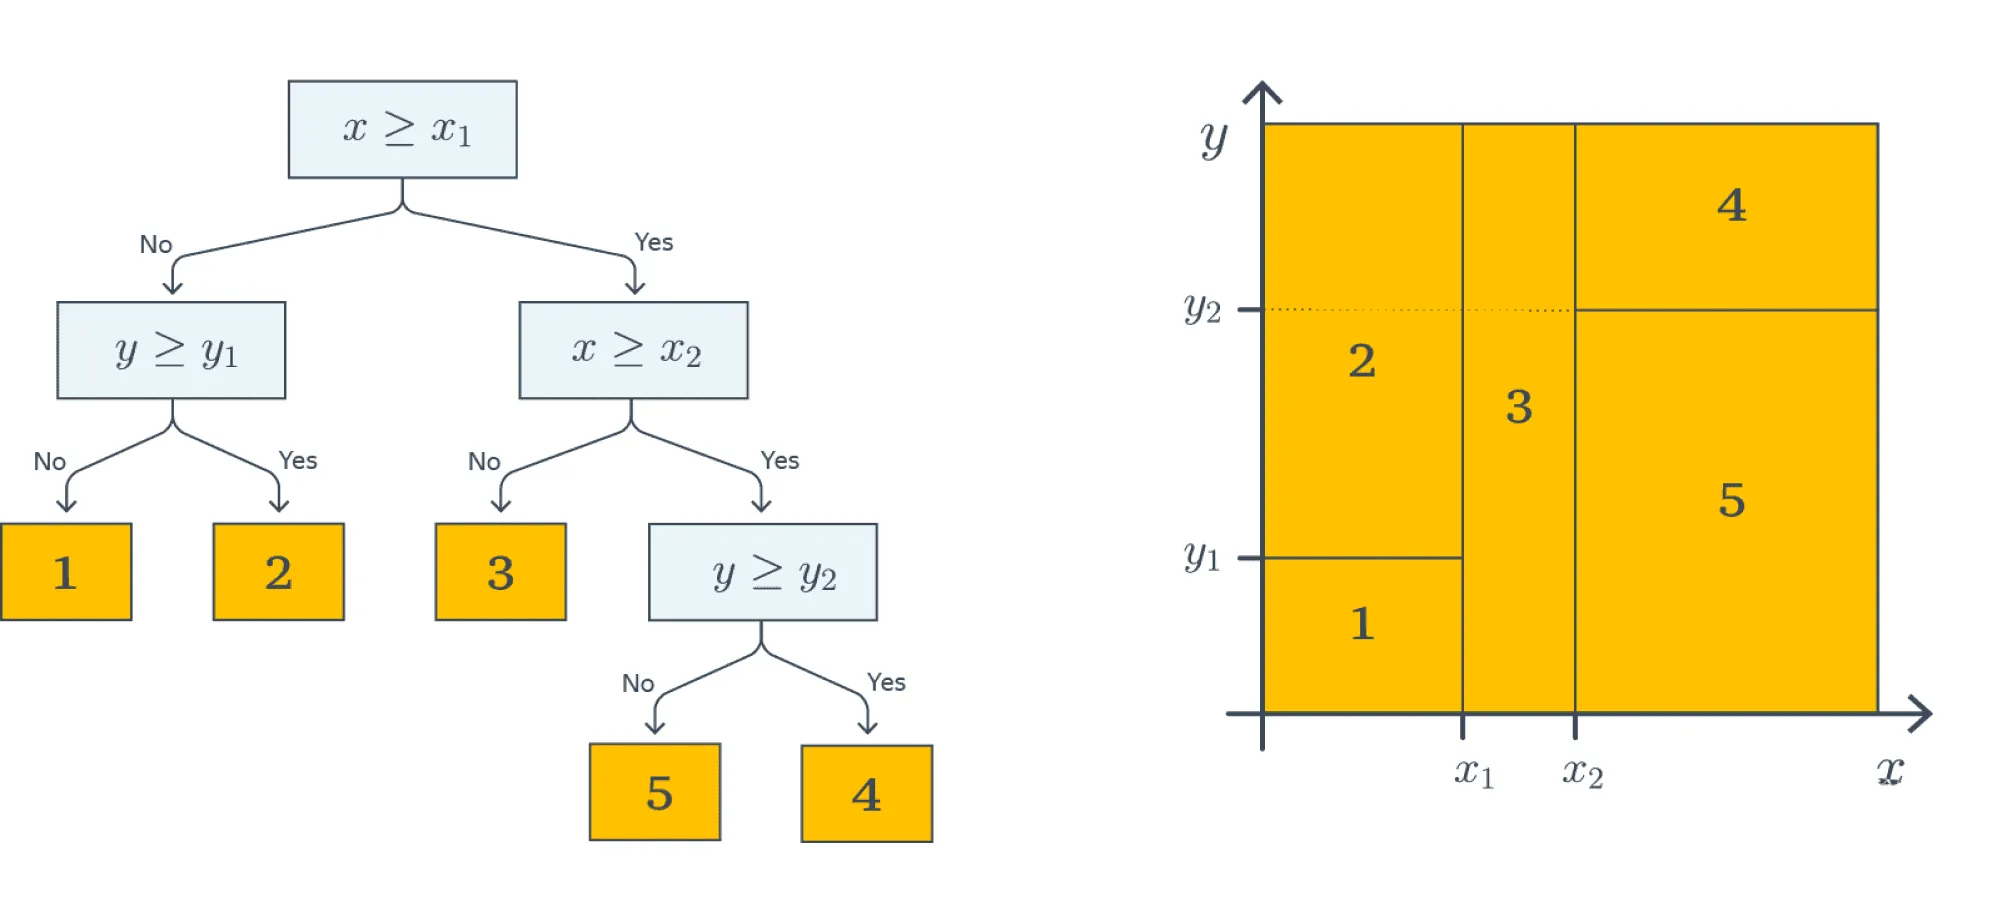

#Примеры решающего правила
- Если в анкете указан домашний телефон и зарплата > 1000$ , то выдать кредит
- Если возраст пациента > 60 и пациент ранее перенес инфаркт,  то операцию не делать
- Возьми хлеба, если будут яйца, то возьми десяток - программист приносит десять булок хлеба


если студент является алгоритмом, то :

-бэггинг - много студентов решают один и тот же вариант контрольной работы по диффурам, при этом у каждого свой набор решенных задач(разный тренировочный датасет)


-бустинг - студент из раза в раза идет пересдавать задачи теорфиза(возможно после академов и отчислений) - один и тот же алгоритм итеративно учится на той же выборке и учится минимизировать ошибку


-стэкинг - студент берет домашку прошлого потока не вникая в то, что ему дали(а прошлый курс получил эту же домашку от позапрошлого) - исходный задавальник студент вообще не видит, тренировочная выборка создается из каких-то других метаданных

Ансамбли моделей представляют собой методы, которые объединяют несколько базовых моделей для улучшения общей производительности и устойчивости алгоритма. Существует несколько видов ансамблей, включая бэггинг, бустинг и стекинг. Бэггинг (например, метод случайного леса) заключается в обучении множества моделей на различных подвыборках данных. Бустинг подразумевает последовательное обучение моделей, где каждая последующая модель исправляет ошибки предыдущих. Стекинг использует метамодель для объединения предсказаний нескольких базовых моделей с целью улучшения точности.

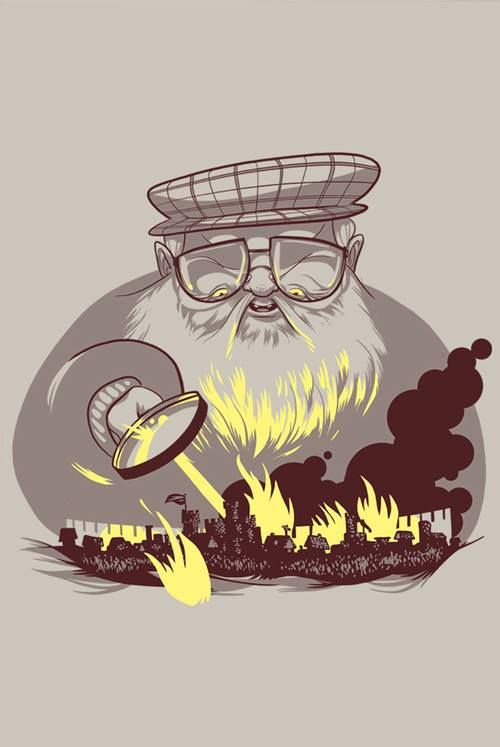

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов A Wiki of Ice and Fire. Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.


Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

In [ ]:
#Загрузка датасета
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 30.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 60.6MB/s]


In [ ]:
# !pip install -q pandas matplotlib xgboost catboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
train_data = pd.read_csv('game_of_thrones_train.csv', index_col=0)
test_data = pd.read_csv('game_of_thrones_test.csv', index_col=0)


In [ ]:
train_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

## Очистка данных и создание новых признаков

Давайте исследуем набор данных и выполним некоторую очистку и создание признаков, чтобы подготовить его для обучения модели.

In [ ]:
# Создание новых признаков: 'isPopular' и 'boolDeadRelations'
train_data['isPopular'] = train_data['popularity'].round()
train_data['boolDeadRelations'] = (train_data['numDeadRelations'] > 0).astype(int)

# Заполнение пропущенных значений
train_data['title'] = train_data['title'].fillna('Unknown')
train_data['house'] = train_data['house'].fillna('Unknown')

# Удаление ненужных столбцов
columns_to_drop = ['name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'spouse',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
                  'age', 'house', 'book1', 'book2', 'book3', 'book4', 'book5']
train_data.drop(columns=columns_to_drop + ['numDeadRelations'], inplace=True)

In [ ]:
train_data

,male,isMarried,isNoble,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,
1,1,0,0,0.605351,0,1.0,1
2,1,1,1,0.896321,1,1.0,1
3,1,0,1,0.267559,1,0.0,0
4,0,1,1,0.183946,0,0.0,0
5,0,1,1,0.043478,1,0.0,0
...,...,...,...,...,...,...,...
1553,1,0,1,0.160535,1,0.0,0
1554,0,0,0,0.040134,0,0.0,0
1555,1,0,0,0.076923,0,0.0,0


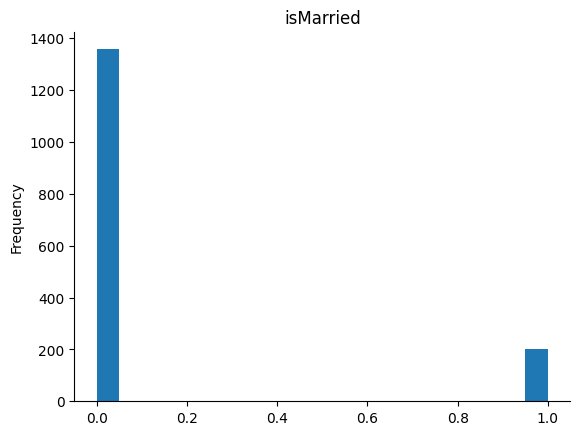

In [ ]:
# @title isMarried

from matplotlib import pyplot as plt
train_data['isMarried'].plot(kind='hist', bins=20, title='isMarried')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Визуализация данных

Давайте визуализируем некоторые признаки, чтобы понять их распределение и взаимосвязь с целевой переменной.


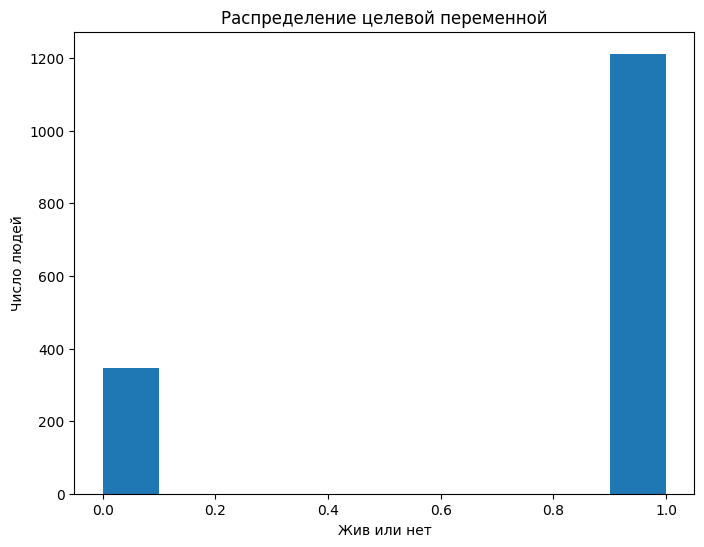

In [ ]:
plt.figure(figsize=(8, 6))
# sns.boxplot(x='isAlive', y='popularity', data=train_data)
plt.hist(train_data['isAlive'])
plt.title('Распределение целевой переменной')
plt.xlabel('Жив или нет')
plt.ylabel('Число людей')
plt.show()


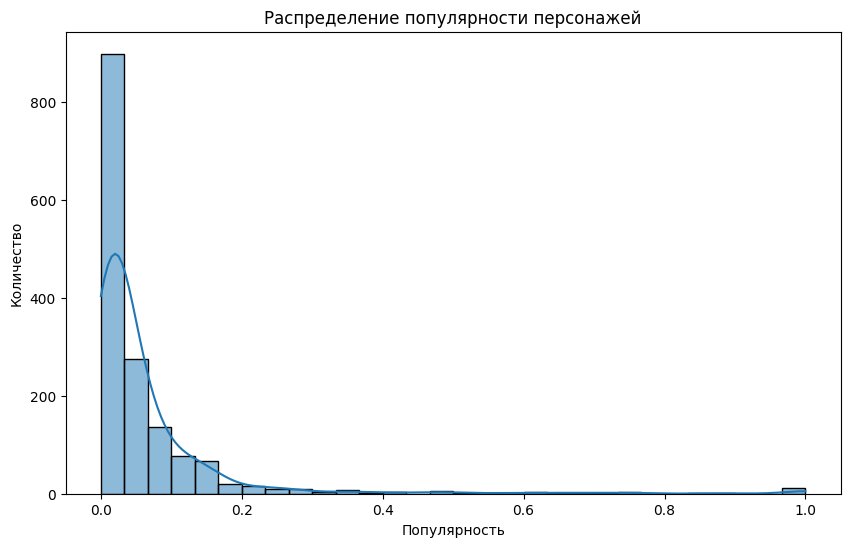

In [ ]:
# График распределения популярности
plt.figure(figsize=(10, 6))
sns.histplot(train_data['popularity'], bins=30, kde=True)
plt.title('Распределение популярности персонажей')
plt.xlabel('Популярность')
plt.ylabel('Количество')
plt.show()


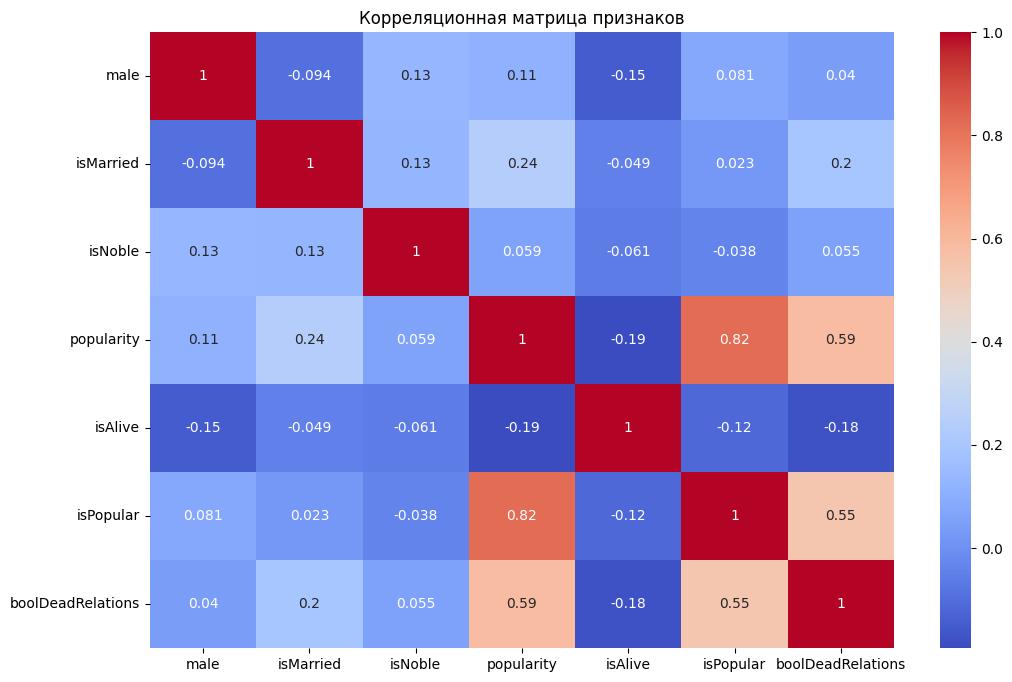

In [ ]:
# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

## Анализ визуализаций


- **Распределение популярности**: График показывает, как распределена популярность персонажей. Мы видим, что у большинства персонажей средняя популярность, но есть также персонажи с высокой популярностью.


- **Корреляционная матрица**: Этот график помогает нам понять, какие признаки могут быть связаны друг с другом. Например, мы можем изучить, как знатность и популярность связаны с вероятностью выживания.

## Подготовка данных для моделирования

Теперь, когда мы очистили и визуализировали наши данные, давайте подготовим их для обучения модели. Мы будем разделять данные на обучающую и тестовую выборки и нормализовать их.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
X = train_data.drop(columns=['isAlive']).values
y = train_data['isAlive'].values

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Обучение модели Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Прогнозирование и оценка модели
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.77
Precision: 0.78
Recall: 0.97
F1-score: 0.87
ROC-AUC: 0.57


<ipython-input-32-9674b1d3ab24>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


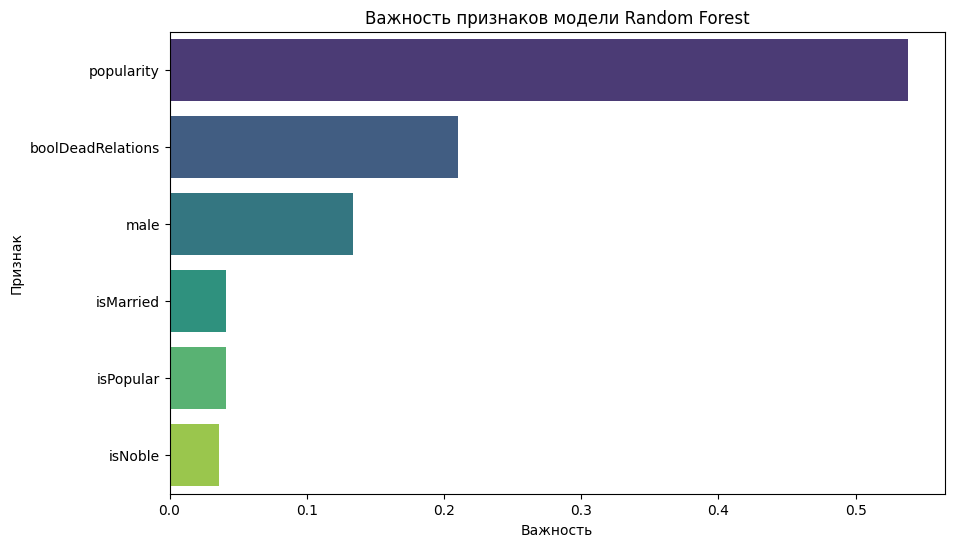

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Извлечение важности признаков
feature_importances = model.feature_importances_
	# male		isNoble	popularity	isAlive	isPopular	boolDeadRelations
# Переименование признаков в соответствии с вашим набором данных
feature_names = ['male', 'isMarried', 'isNoble', 'popularity', 'isPopular', 'boolDeadRelations']

# Создание DataFrame для удобного отображения
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Сортировка признаков по важности
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Важность признаков модели Random Forest')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()



1. Извлечение важности признаков: Мы используем model.feature_importances_ для получения важности каждого признака. Это числовые значения, которые показывают, насколько каждый признак повлиял на предсказания модели.

2. Создание DataFrame: Мы создаем DataFrame importances_df, который содержит названия признаков и их важность, для удобного отображения и сортировки.

3. Сортировка и визуализация: Сортируем DataFrame по важности признаков и строим горизонтальный барплот с помощью seaborn. Этот график помогает легко определить, какие признаки являются наиболее важными для модели.

Этот график позволяет визуально оценить, какие признаки имеют наибольшее влияние на предсказания модели, что может быть полезно для дальнейшего анализа и усовершенствования модели.

## Случайный лес (Random Forest) оценивает важность признаков на основе следующих принципов:

1. Снижение неопределенности (Decrease in Impurity):
   - Каждый раз, когда дерево в случайном лесе делится по какому-то признаку, оно уменьшает неопределенность (или "шум") в узлах. Общая идея заключается в том, что хороший признак сделает узлы "чище", то есть они будут содержать более однородные классы.
   - Важность признака рассчитывается как сумма всех уменьшений шума (например, критерий джини или энтропии) по всем деревьям в лесу, где этот признак использовался для разбиения.

2. Out-of-Bag (OOB) Error Reduction:
   - В случайных лесах также можно оценивать важность признака, оценивая, насколько он влияет на ошибку на OOB-данных (наборах данных, не использованных при обучении конкретного дерева).
   - Если удаление или рандомизация признака значительно увеличивает ошибку OOB, этот признак считается важным.

3. Среднее уменьшение в точности (Mean Decrease in Accuracy):
   - Это метод, который оценивает изменения в точности модели после случайного перетасовки значений признака. Если точность модели значительно падает, когда признак перетасован, то этот признак считается важным.

### Преимущества использования случайного леса для оценки важности признаков:

- Устойчивость к шуму: Поскольку случайный лес обучает множество деревьев на случайных подвыборках и случайных подмножеств признаков, он менее подвержен влиянию шума в данных.
- Гибкость: Метод работает как с линейными, так и с нелинейными зависимостями между признаками и целевой переменной.
- Непараметричность: Случайный лес не делает предположений о распределении данных и может работать с разными типами данных.

Использование случайного леса для оценки важности признаков может дать хорошее представление о том, какие признаки наиболее полезны для предсказания целевой переменной, и помочь в отборе признаков для других моделей или в интерпретации модели.



In [ ]:
# Пример разбора атрибутов класса RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Инициализация модели
model = RandomForestClassifier()

# Вывод всех атрибутов и методов класса
print("Атрибуты и методы RandomForestClassifier:")
print(dir(model))

# Получение справки по классу
print("\nДокументация по RandomForestClassifier:")
help(RandomForestClassifier)


Атрибуты и методы RandomForestClassifier:
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_estimators_indices', '_get_metadata_request', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_r

## Анализ результатов модели

- **Точность (Accuracy)**: Указывает, какая доля предсказаний оказалась верной. Это общее количество правильных предсказаний, деленное на общее количество примеров.

- ** (Precision)**: Показывает, какая доля предсказанных положительных результатов действительно положительна. Это отношение истинно положительных результатов к сумме истинно положительных и ложно положительных результатов.

- **Полнота (Recall)**: Показывает, какая доля истинных положительных результатов была обнаружена моделью. Это отношение истинно положительных результатов к сумме истинно положительных и ложно отрицательных результатов.

- **F1-мера**: Среднее гармоническое между точностью и полнотой. F1-мера учитывает как ложноположительные, так и ложноотрицательные предсказания и полезна, когда нужно найти баланс между точностью и полнотой.

- **ROC-AUC**: Площадь под кривой ошибок (Receiver Operating Characteristic curve). Она показывает, насколько хорошо модель может различать классы. Значение 0.5 указывает на отсутствие способности к различению (как случайная догадка), а значение 1.0 — на идеальное различение.


## Обучение модели бустинга

Теперь мы попробуем обучить модель с использованием техники бустинга. Для этого мы будем использовать библиотеку XGBoost, которая является одной из самых популярных реализаций бустинга.


In [ ]:
import xgboost as xgb

# Обучение модели XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42, max_depth=5)
xgb_model.fit(X_train, y_train)

# Прогнозирование и оценка модели
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print(f'XGBoost Precision: {precision_xgb:.2f}')
print(f'XGBoost Recall: {recall_xgb:.2f}')
print(f'XGBoost F1-score: {f1_xgb:.2f}')
print(f'XGBoost ROC-AUC: {roc_auc_xgb:.2f}')


XGBoost Accuracy: 0.76
XGBoost Precision: 0.78
XGBoost Recall: 0.95
XGBoost F1-score: 0.86
XGBoost ROC-AUC: 0.57


## используем Стэкинг
1. Базовые модели: Мы используем RandomForestClassifier и XGBClassifier в качестве базовых моделей. Каждая из них обучается на полных данных и делает свои предсказания.

2. Мета-модель: LogisticRegression используется в качестве мета-оценивателя. Она обучается на предсказаниях базовых моделей и комбинирует их для получения окончательного прогноза.

3. StackingClassifier: Создается стекинг-классификатор, который объединяет предсказания базовых моделей с помощью мета-модели.

4. Обучение и оценка: Мы обучаем стекинг-классификатор на обучающей выборке и оцениваем его производительность на тестовой выборке, используя метрики точности, полноты, точности, F1-меры и ROC-AUC.

Стекинг может значимо улучшить результаты, особенно если базовые модели имеют разные сильные стороны, и их комбинация может компенсировать слабости каждой из них.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Определение базовых моделей
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42, max_depth=5))
]

# Определение мета-модели
meta_model = LogisticRegression()

# Создание стекинг-классификатора
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Обучение стекинг-модели
stacking_clf.fit(X_train, y_train)

# Прогнозирование и оценка стекинг-модели
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)

print(f'Stacking Accuracy: {accuracy_stacking:.2f}')
print(f'Stacking Precision: {precision_stacking:.2f}')
print(f'Stacking Recall: {recall_stacking:.2f}')
print(f'Stacking F1-score: {f1_stacking:.2f}')
print(f'Stacking ROC-AUC: {roc_auc_stacking:.2f}')


Stacking Accuracy: 0.77
Stacking Precision: 0.77
Stacking Recall: 0.98
Stacking F1-score: 0.86
Stacking ROC-AUC: 0.55


## Анализ результатов модели бустинга

Сравним результаты модели XGBoost с моделью Random Forest, чтобы понять, какая из них лучше справляется с задачей предсказания выживания персонажей.


## Заключение

В этом уроке мы исследовали различные техники машинного обучения для предсказания выживания персонажей из "Песнь Льда и Огня". Мы рассмотрели методы бэггинга и бустинга, их особенности и различия.

- **Random Forest**
- **XGBoost**,
В будущем можно улучшить модели, добавив больше признаков, настроив гиперпараметры, или применив кросс-валидацию.


In [ ]:
print(5)

5
